# Comparing similarity measures

In this notebook a comparison between experimental results on humans and different similarity metrics are compared. 
This version uses dictionaries to avoid running the program many times.

# PENDING...

 - Normalizar todo.. 
 - Respaldar en github...
 - Hacer comparaciones contra individuos especificos de la encuesta (mi respuesta y otras que parezcan coherentes..)
   (PARA ESO debo de MARCAR las preguntas que eliminé...)
 - "Normalizar" datos, en vez de 1 - 6 pasar de 0 a 1... 
 - Hacer un conjunto de prueba hecho por mi, de 20 parejas
 - Comenzar a añadir 'la otra forma' de codificar... hacer algunas pruebas básicas... 
 - Viernes enseñar resultados a Barrón y preguntarle si añado lo de la otra forma de codificar... 


### Importing libraries

In [27]:
import pandas as pd
import nltk
import matplotlib
import matplotlib.pyplot as plt
import numpy
from scipy.stats.stats import pearsonr   

%matplotlib inline

#nltk.download('wordnet')
#nltk.download('wordnet_ic')
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic


#pathh = '../McRaedataset/'  # @ home
pathh = ''    # @ school
#exp_file = 'ExperimentalResults_2.xlsx'  #Datos obtenidos con mis encuestas
#exp_file = 'ExperimentalResults_3.xlsx'   # Datos de MTURK-771
exp_file = 'ExperimentalResults_4.xlsx'   # Q1 Modificado...

### Getting pairs of concepts

[['spoon', 'barrel'], ['spoon', 'envelope'], ['shoes', 'bike'], ['chair', 'pen'], ['shoes', 'carpet'], ['spoon', 'box'], ['spoon', 'truck'], ['table', 'brush'], ['shoes', 'skirt'], ['table', 'curtains'], ['shoes', 'shield'], ['table', 'spoon'], ['table', 'knife'], ['stove', 'pot'], ['bed', 'pajamas'], ['bed', 'mink_(coat)'], ['pen', 'envelope'], ['shoes', 'mink_(coat)'], ['shovel', 'machete'], ['chair', 'car'], ['table', 'barrel'], ['spoon', 'basket'], ['shoes', 'whip'], ['bed', 'lamp'], ['table', 'lamp'], ['chair', 'book'], ['shoes', 'earmuffs'], ['table', 'bookcase'], ['shoes', 'socks'], ['cup', 'bottle'], ['spoon', 'colander'], ['bed', 'curtains'], ['carpet', 'scarf'], ['table', 'sofa'], ['bed', 'chair'], ['bowl', 'bathtub'], ['spoon', 'ashtray'], ['bed', 'dresser'], ['bed', 'closet'], ['bed', 'table'], ['table', 'bench'], ['bed', 'cushion'], ['bed', 'pillow'], ['boots', 'belt'], ['shoes', 'belt'], ['chair', 'dresser'], ['chair', 'closet'], ['chair', 'bookcase'], ['spoon', 'plate'],

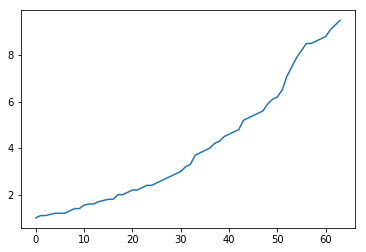

In [28]:
def ListofPairs (number):
    "It obtains a list of pairs of concepts"
    df = pd.read_excel(exp_file)
    if number > 0:
        string = 'Q' + str(number)    
    else:
        string = 'average'
    # 1) List of concepts
    ordered = df.sort_values(by=string)
    c1 = map(str, list( ordered['concept 1'] ))
    c2 = map(str, list( ordered['concept 2'] ))
    L1 = map(list, zip(c1,c2))
    # 2) Human similarity
    ordered = df.sort_values(by=string)
    L2 = list(ordered[string])
    #L2 = map(lambda x: round(float(x), 3) / 10, list(ordered[string]))
    
    return L1, L2

PConcepts, Hum_Sim = ListofPairs(1)
print PConcepts
print len(PConcepts)
#print Hum_Sim
# Plotting
plt.plot(Hum_Sim)

## HD Computing similarity

### Initializing memory and encoding dataset

In [29]:
%run KB_HDComputing.ipynb

# Initializing Memory
Init_mem()

End of initialization
End of encoding


### Comparing pairs of concepts in the HD binary space

To make computations more efficient I created a dictionary where the similarity between a pair of concepts is stored. Everytime that a similarity is required the only thing to do is to consult this dictionary

[['spoon', 'barrel'], ['spoon', 'envelope'], ['shoes', 'bike'], ['chair', 'pen'], ['shoes', 'carpet'], ['spoon', 'box'], ['spoon', 'truck'], ['table', 'brush'], ['shoes', 'skirt'], ['table', 'curtains'], ['shoes', 'shield'], ['table', 'spoon'], ['table', 'knife'], ['stove', 'pot'], ['bed', 'pajamas'], ['bed', 'mink_(coat)'], ['pen', 'envelope'], ['shoes', 'mink_(coat)'], ['shovel', 'machete'], ['chair', 'car'], ['table', 'barrel'], ['spoon', 'basket'], ['shoes', 'whip'], ['bed', 'lamp'], ['table', 'lamp'], ['chair', 'book'], ['shoes', 'earmuffs'], ['table', 'bookcase'], ['shoes', 'socks'], ['cup', 'bottle'], ['spoon', 'colander'], ['bed', 'curtains'], ['carpet', 'scarf'], ['table', 'sofa'], ['bed', 'chair'], ['bowl', 'bathtub'], ['spoon', 'ashtray'], ['bed', 'dresser'], ['bed', 'closet'], ['bed', 'table'], ['table', 'bench'], ['bed', 'cushion'], ['bed', 'pillow'], ['boots', 'belt'], ['shoes', 'belt'], ['chair', 'dresser'], ['chair', 'closet'], ['chair', 'bookcase'], ['spoon', 'plate'],

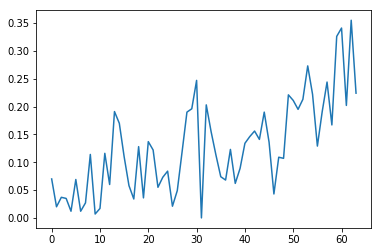

In [30]:
# Distance vector
HD_sim = []
print PConcepts
for cc in PConcepts:
#    print cc
    HD_sim.append( HDvector.dist(Dict[cc[0]].getPointer(), Dict[cc[1]].getPointer()) )
#Normalizing...
HD_sim = map(lambda x: round(1. - x/float( max(HD_sim)) , 3), HD_sim)

# Dictionary of distances
Dict_HD = {}
for key in range(len(HD_sim)):
    Dict_HD[key] = HD_sim[key]

# Plotting
plt.plot(HD_sim)

## McRae similarity

The following cells consult the similarity for each pair of concepts in the distance matrix provided.

In [31]:
def McRae_simi (pair_concepts):
    "Given a pair of concepts (in a list) it consults the similarity from the cos_matrix... file"
    try: 
        df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','1st_200')
        return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]
    except:
        try:
            df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','2nd_200')
            return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]
        except:
            df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','last_141')
            return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]


# Dictionary of distances (McRae)
print "Inicio"
Dict_McRae = {}
key = 0
for cc in PConcepts:
    Dict_McRae[key] = McRae_simi(cc)
    key += 1

print "Fin"
#plt.plot( )

## NTLK Library functions

### Auxiliary functions

In [32]:
brown_ic = wordnet_ic.ic('ic-brown.dat')

def get_synset (concept):
    "Given a concept name (string) it returns its synset (string)"
    # Dataframe for excel document
    df = pd.read_excel(pathh + 'CONCS_Synset_brm.xlsx') #../McRaedataset/CONCS_Synset_brm.xlsx')
    row = df.loc[df['Concept'] == concept]
    return str(list(row['Synset'] )[0])

def similarity_fun ( similarity_metric, pair, corpus = None):
    "Given a similarity_metric function it returns a list of the num closest concepts to 'concept'"
    c_synset_1 = wn.synset( get_synset(pair[0]))
    c_synset_2 = wn.synset( get_synset(pair[1]))
    if corpus:
        return round(similarity_metric(c_synset_1, c_synset_2, corpus), 3)
    else:
        return round(similarity_metric(c_synset_1, c_synset_2), 3)

## Similarity metrics

In [33]:
# Path similarity
Dict_path = {}
Dict_lch = {}
Dict_wup = {}
Dict_res = {}
Dict_jcn = {}
Dict_lin = {}

print "Inicio"
key = 0
for pair in PConcepts:
    Dict_path[key] = similarity_fun(wn.path_similarity, pair)
    Dict_lch[key] = similarity_fun(wn.lch_similarity, pair)
    Dict_wup[key] = similarity_fun(wn.wup_similarity, pair)
    Dict_res[key] = similarity_fun(wn.res_similarity, pair, brown_ic)
    Dict_jcn[key] = similarity_fun(wn.jcn_similarity, pair, brown_ic)
    Dict_lin[key] = similarity_fun(wn.lin_similarity, pair, brown_ic)
    key += 1

print "Fin"

## Correlations

Using correlation to compare obtained similarity values from different metrics.
Loop to obtain correlations between each questionary (and the average) and each similarity metric

In [34]:
print "Inicio"
Corr_mat = []
for Q in range(31):
    # 1) Obtain "human list", it can be the average responses or an specific one
    Hum_sim =  ListofPairs(Q) #or Q + #1-30
    
    # 2) Obtain list of keys for previous list
    keys = map(lambda x: PConcepts.index(x), Hum_sim[0])
    
    # 3) Create a list of distances according to each metric by consulting the appropiate dictionary
    HD_sim = [Dict_HD[x] for x in keys]
    McRae_sim = [Dict_McRae[x] for x in keys]
    path_sim = [Dict_path[x] for x in keys]
    lch_sim = [Dict_lch[x] for x in keys]
    # optional... 
    lch_sim = map(lambda x: round(x/float( max(lch_sim)) , 3), lch_sim)
    
    wup_sim = [Dict_wup[x] for x in keys]
    res_sim = [Dict_res[x] for x in keys]
    # optional
    res_sim = map(lambda x: round(x/float( max(res_sim)) , 3), res_sim)
    
    jcn_sim = [Dict_jcn[x] for x in keys]
    lin_sim = [Dict_lin[x] for x in keys]

    # 4) Calculate correlations
    correlations = [['HDC', pearsonr(Hum_sim[1], HD_sim)[0]], ['McRae', pearsonr(Hum_sim[1], McRae_sim)[0]],
                    ['path', pearsonr(Hum_sim[1], path_sim)[0]], ['lch', pearsonr(Hum_sim[1], lch_sim)[0]],
                    ['wup', pearsonr(Hum_sim[1], wup_sim)[0]], ['res', pearsonr(Hum_sim[1], res_sim)[0]],
                    ['jcn', pearsonr(Hum_sim[1], jcn_sim)[0]], ['lin', pearsonr(Hum_sim[1], lin_sim)[0]]]

    # 5) Sort list so far (key = )
    correlations = sorted(correlations, key = lambda x: x[1], reverse = True)
    
    # 6) Adding 'name' and average correlation value
    Corr_mat.append( ['Q' + str(Q), np.mean([r[1] for r in correlations])] + correlations )

# 7) Sorting entire matrix by average value (last...)
Corr_mat = sorted(Corr_mat, key = lambda x: x[-1], reverse = True)

# Printing
for v in Corr_mat:
    print v

['Q3', 0.5944707966524045, ['HDC', 0.7053845332050873], ['res', 0.6577614906127348], ['McRae', 0.635950624435947], ['jcn', 0.6154477235373255], ['path', 0.5562118840318037], ['lin', 0.5491882602484143], ['lch', 0.5271583062509282], ['wup', 0.508663550896996]]
['Q1', 0.5935277385935246, ['HDC', 0.7281290562294039], ['McRae', 0.6607765197456652], ['res', 0.6378787665088864], ['jcn', 0.6132732317473484], ['path', 0.550154684802676], ['lin', 0.5468917187203642], ['lch', 0.516211829948031], ['wup', 0.4949061010458211]]
['Q24', 0.5364064316266144, ['HDC', 0.7492729702578965], ['McRae', 0.653609871725065], ['jcn', 0.556528252202636], ['res', 0.5326522166829489], ['path', 0.5124958597377783], ['lin', 0.44377911632465156], ['lch', 0.44339373603528853], ['wup', 0.39951943004664997]]
['Q25', 0.4735892967416486, ['HDC', 0.7121983555237832], ['McRae', 0.6399808913880194], ['jcn', 0.45817630746364985], ['res', 0.44663941701157805], ['lin', 0.40894377855213354], ['path', 0.4076076535268331], ['lch', 

In [38]:
print HD_sim
print McRae_sim
print path_sim
print lch_sim
print wup_sim
print res_sim
print jcn_sim
print lin_sim

[0.07, 0.058, 0.055, 0.073, 0.06, 0.116, 0.036, 0.02, 0.017, 0.027, 0.012, 0.084, 0.021, 0.035, 0.037, 0.247, 0.141, 0.068, 0.122, 0.034, 0.119, 0.069, 0.114, 0.007, 0.19, 0.049, 0.123, 0.11, 0.089, 0.113, 0.109, 0.0, 0.137, 0.128, 0.012, 0.062, 0.191, 0.17, 0.203, 0.211, 0.136, 0.043, 0.221, 0.19, 0.107, 0.129, 0.195, 0.244, 0.167, 0.146, 0.074, 0.202, 0.326, 0.155, 0.191, 0.156, 0.213, 0.355, 0.196, 0.273, 0.222, 0.341, 0.134, 0.224]
[0.134, 0.044, 0.306, 0.026, 0.035, 0.149, 0.0, 0.0, 0.0, 0.0, 0.0, 0.031, 0.0, 0.0, 0.0, 0.336, 0.29, 0.017, 0.104, 0.0, 0.325, 0.03, 0.093, 0.0, 0.377, 0.039, 0.121, 0.158, 0.02, 0.082, 0.222, 0.0, 0.514, 0.17, 0.0, 0.037, 0.477, 0.149, 0.159, 0.425, 0.202, 0.0, 0.35, 0.227, 0.119, 0.192, 0.323, 0.546, 0.382, 0.284, 0.022, 0.319, 0.546, 0.138, 0.204, 0.374, 0.715, 0.62, 0.34, 0.395, 0.511, 0.411, 0.323, 0.405]
[0.25, 0.167, 0.125, 0.25, 0.1, 0.167, 0.1, 0.333, 0.2, 0.167, 0.167, 0.333, 0.091, 0.125, 0.125, 0.143, 0.167, 0.25, 0.333, 0.111, 0.333, 0.333